### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets.cifar10 import load_data

Probamos pasando las imágenes a blanco y negro

In [51]:
(x_train, y_train), (x_test, y_test) = load_data()

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [52]:
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)
# Pasamos a imágenes en blanco y negro

In [12]:
x_train.shape

TensorShape([50000, 32, 32, 1])

In [59]:
def build_model(input_shape):

    model = keras.Sequential()
    model.add(keras.layers.Conv2D(8, kernel_size=(3, 3), padding='same', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32, activation='ReLU'))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [27]:
model = build_model(input_shape=(32, 32, 1))

In [28]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 65,978
Trainable params: 65,978
Non-trainable params: 0
__________________________________________________

In [35]:
early_stop = keras.callbacks.EarlyStopping('val_accuracy', patience=5)

In [36]:
history = model.fit(x=x_train, y=y_train, validation_split=0.2, batch_size=64, epochs=100, callbacks=[early_stop])

Epoch 1/100
625/625 [==============================] - 9s 14ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 2/100
625/625 [==============================] - 9s 14ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 3/100
625/625 [==============================] - 9s 14ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 4/100
625/625 [==============================] - 9s 14ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 5/100
625/625 [==============================] - 9s 14ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 6/100
625/625 [==============================] - 9s 14ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 7/100
625/625 [==============================] - 9s 14ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy:

In [53]:
model.evaluate(x_test, y_test, batch_size=64)
# Tenemos un accuracy del 10%

157/157 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302619218826294, 0.10000000149011612]

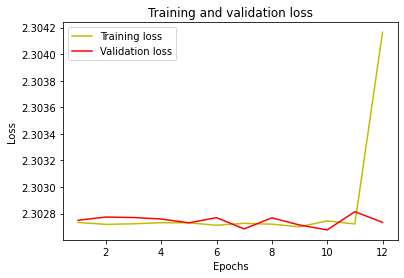

In [56]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [60]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# Imágenes en RGB

In [61]:
model = build_model(input_shape=(32, 32, 3))

In [62]:
history = model.fit(x=x_train, y=y_train, validation_split=0.2, batch_size=64, epochs=100, callbacks=[early_stop])

Epoch 1/100
625/625 [==============================] - 9s 13ms/step - loss: 3.1847 - accuracy: 0.1016 - val_loss: 2.3351 - val_accuracy: 0.0951
Epoch 2/100
625/625 [==============================] - 10s 16ms/step - loss: 2.3041 - accuracy: 0.1000 - val_loss: 2.3152 - val_accuracy: 0.0952
Epoch 3/100
625/625 [==============================] - 10s 16ms/step - loss: 2.3033 - accuracy: 0.1008 - val_loss: 2.3116 - val_accuracy: 0.0952
Epoch 4/100
625/625 [==============================] - 12s 19ms/step - loss: 2.3026 - accuracy: 0.0984 - val_loss: 2.3119 - val_accuracy: 0.0980
Epoch 5/100
625/625 [==============================] - 12s 20ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3119 - val_accuracy: 0.0980
Epoch 6/100
625/625 [==============================] - 11s 18ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3127 - val_accuracy: 0.0952
Epoch 7/100
625/625 [==============================] - 12s 19ms/step - loss: 2.3026 - accuracy: 0.1009 - val_loss: 2.3136 - val_acc

In [63]:
model.evaluate(x_test, y_test, batch_size=64)
# Tenemos un acierto de 10%

157/157 [==============================] - 1s 7ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026182651519775, 0.10000000149011612]

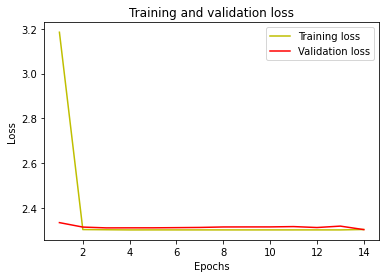

In [64]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()